In [15]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import sys
sys.path.insert(0, '../utils/')
import functions
import importlib
importlib.reload(functions)
import numpy as np

In [16]:
df = pd.read_csv('../data/monthly_sales.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df = df.asfreq('ME')

In [17]:
for col in list(df.columns):
    df[col+'_log'] = np.log1p(df[col])

In [18]:
train = df[:-6].copy()
test =df[-6:].copy()

In [19]:
test

,Furniture,Office Supplies,Technology,Furniture_log,Office Supplies_log,Technology_log
2014-07-31,13881.7230,10698.924,23847.718,9.538400,9.277992,10.079486
2014-08-31,14909.2660,29973.174,16633.646,9.609805,10.308091,9.719243
2014-09-30,29597.7740,32759.017,28131.931,10.295488,10.396964,10.244696
2014-10-31,21884.0682,23402.812,32506.875,9.993560,10.060654,10.389238
2014-11-30,32926.9870,30069.931,49329.553,10.402078,10.311314,10.806299
2014-12-31,35537.1948,31854.508,23082.898,10.478363,10.368966,10.046891


In [20]:
from pmdarima import auto_arima

furniture_automodel =auto_arima(train['Furniture_log'], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=11,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

ofsupplies_automodel = auto_arima(train['Office Supplies_log'], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=11,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

ofsupplies_automodel =  auto_arima(train['Technology_log'], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=11,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic


 ARIMA(0,0,0)(0,1,1)[11] intercept   : AIC=77.022, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[11] intercept   : AIC=76.891, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[11] intercept   : AIC=79.313, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[11] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[11]             : AIC=75.874, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[11] intercept   : AIC=78.169, Time=0.38 sec
 ARIMA(0,0,0)(1,1,1)[11] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(0,1,0)[11] intercept   : AIC=77.522, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[11] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[11] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,1,0)[11]          
Total fit time: 2.965 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[11] intercept   : AIC=78.464, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[11] intercept   : AIC=78.137, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[11] intercept   : AIC=80.937, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[11] intercept   : AIC=80.

In [21]:
sar_furniture = sm.tsa.statespace.SARIMAX(train['Furniture_log'], 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()
sar_furniture.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:            Furniture_log   No. Observations:                   42
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                  -7.243
Date:                  Fri, 04 Jul 2025   AIC                             18.485
Time:                          20:46:41   BIC                             21.288
Sample:                      01-31-2011   HQIC                            19.382
                           - 06-30-2014                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1174      0.059      1.994      0.046       0.002       0.233
sigma2         0.0949      0.032      2.937      0.003       0.032       0.158
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.60   Prob(JB):                         0.54
Heteroskedasticity (H):               0.89   Skew:                            -0.33
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

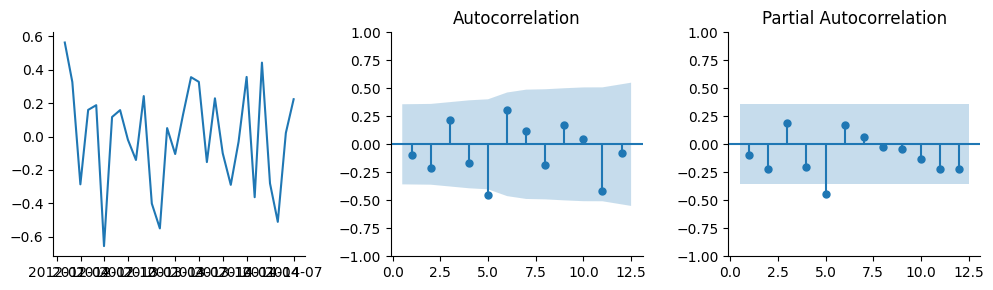

In [22]:
functions.plots(sar_furniture.resid[sar_furniture.loglikelihood_burn:], lags=12);

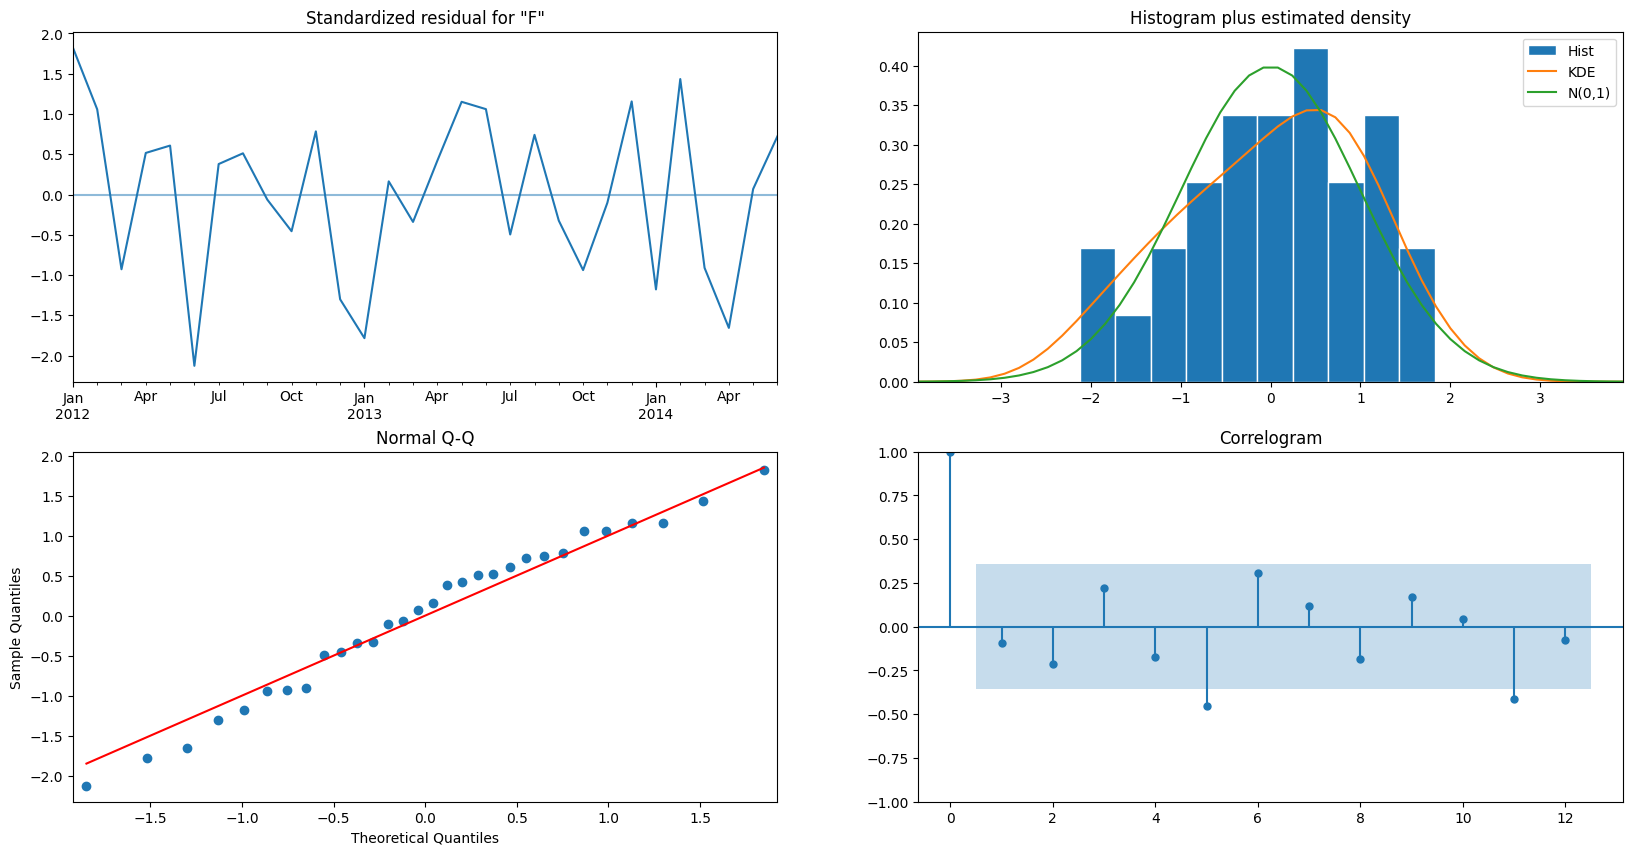

In [23]:
sar_furniture.plot_diagnostics(lags=12,figsize = (20,10),);

In [24]:
sar_ofsupplies = sm.tsa.statespace.SARIMAX(train['Office Supplies_log'], 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()
sar_ofsupplies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:      Office Supplies_log   No. Observations:                   42
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -26.498
Date:                  Fri, 04 Jul 2025   AIC                             56.996
Time:                          20:46:44   BIC                             59.798
Sample:                      01-31-2011   HQIC                            57.893
                           - 06-30-2014                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1923      0.108      1.775      0.076      -0.020       0.405
sigma2         0.3425      0.077      4.467      0.000       0.192       0.493
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.78   Prob(JB):                         0.59
Heteroskedasticity (H):               0.39   Skew:                             0.28
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

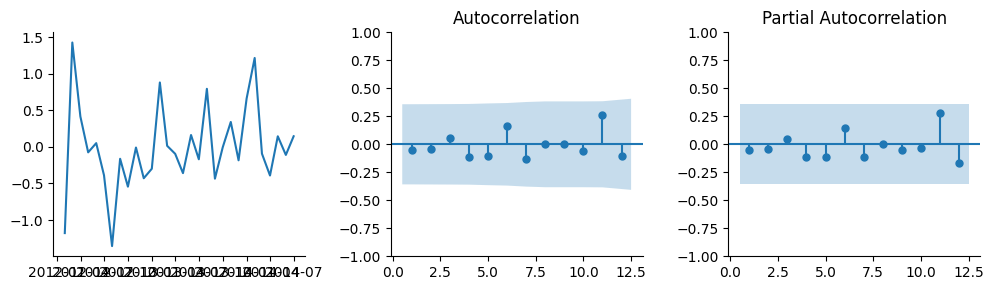

In [25]:
functions.plots(sar_ofsupplies.resid[sar_ofsupplies.loglikelihood_burn:], lags=12);

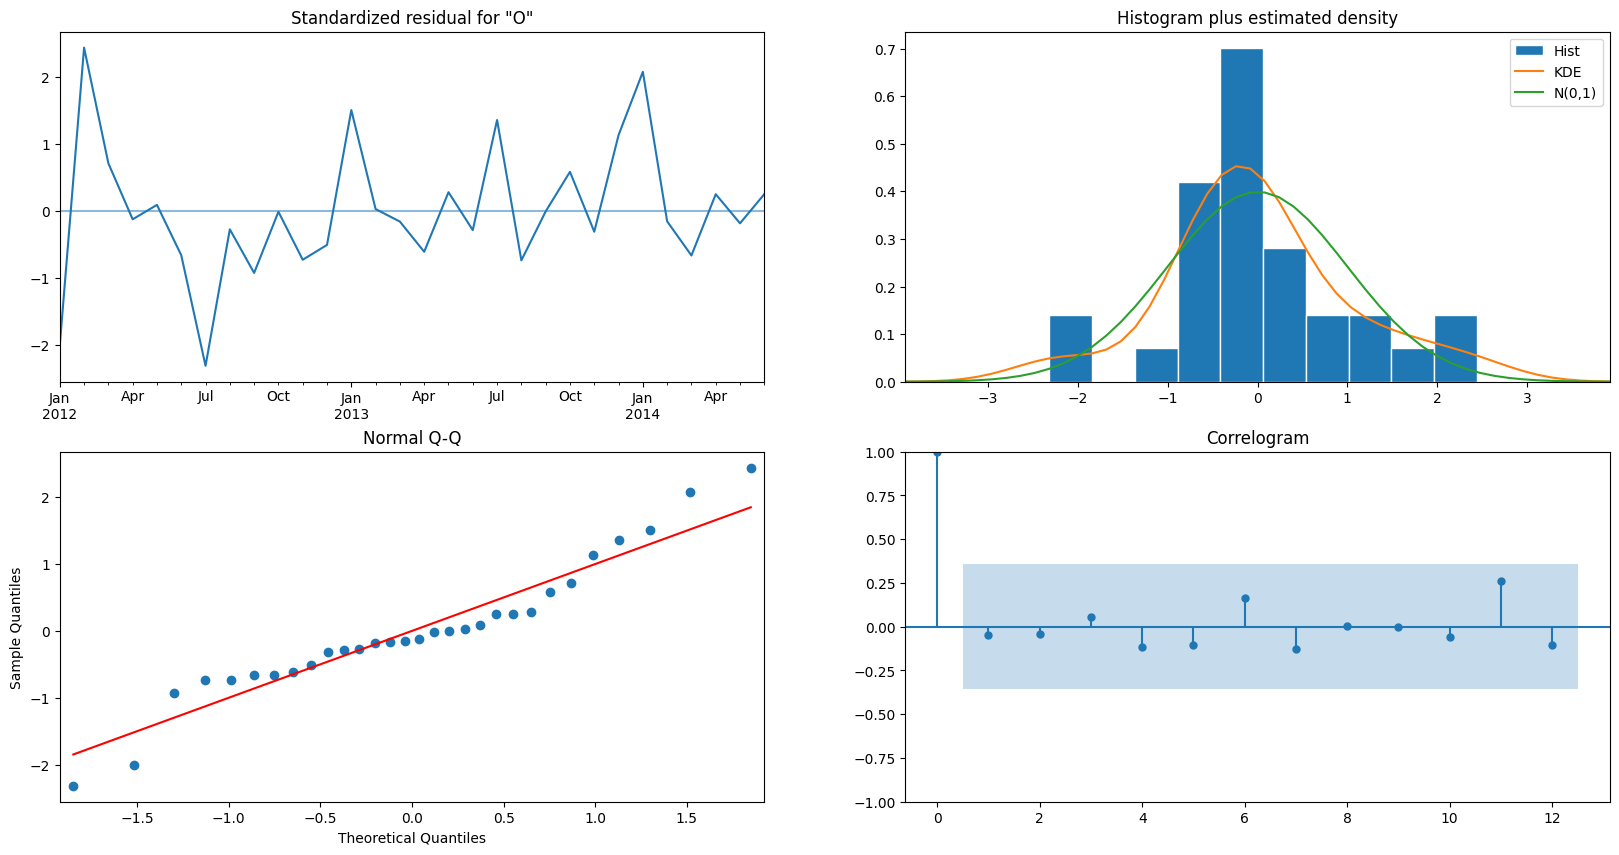

In [26]:
sar_ofsupplies.plot_diagnostics(lags=12,figsize = (20,10),);

In [27]:
sar_tech = sm.tsa.statespace.SARIMAX(train['Technology_log'], 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()
sar_tech.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:           Technology_log   No. Observations:                   42
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -26.008
Date:                  Fri, 04 Jul 2025   AIC                             56.016
Time:                          20:46:47   BIC                             58.818
Sample:                      01-31-2011   HQIC                            56.912
                           - 06-30-2014                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1900      0.106      1.794      0.073      -0.018       0.398
sigma2         0.3315      0.097      3.425      0.001       0.142       0.521
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.67   Prob(JB):                         0.85
Heteroskedasticity (H):               1.25   Skew:                            -0.16
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

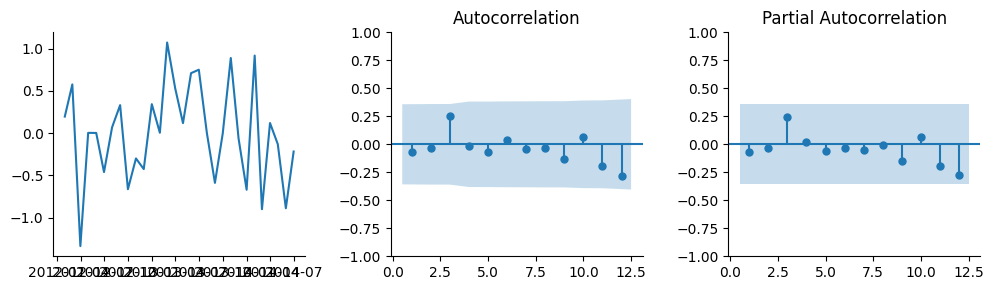

In [28]:
functions.plots(sar_tech.resid[sar_tech.loglikelihood_burn:], lags=12);

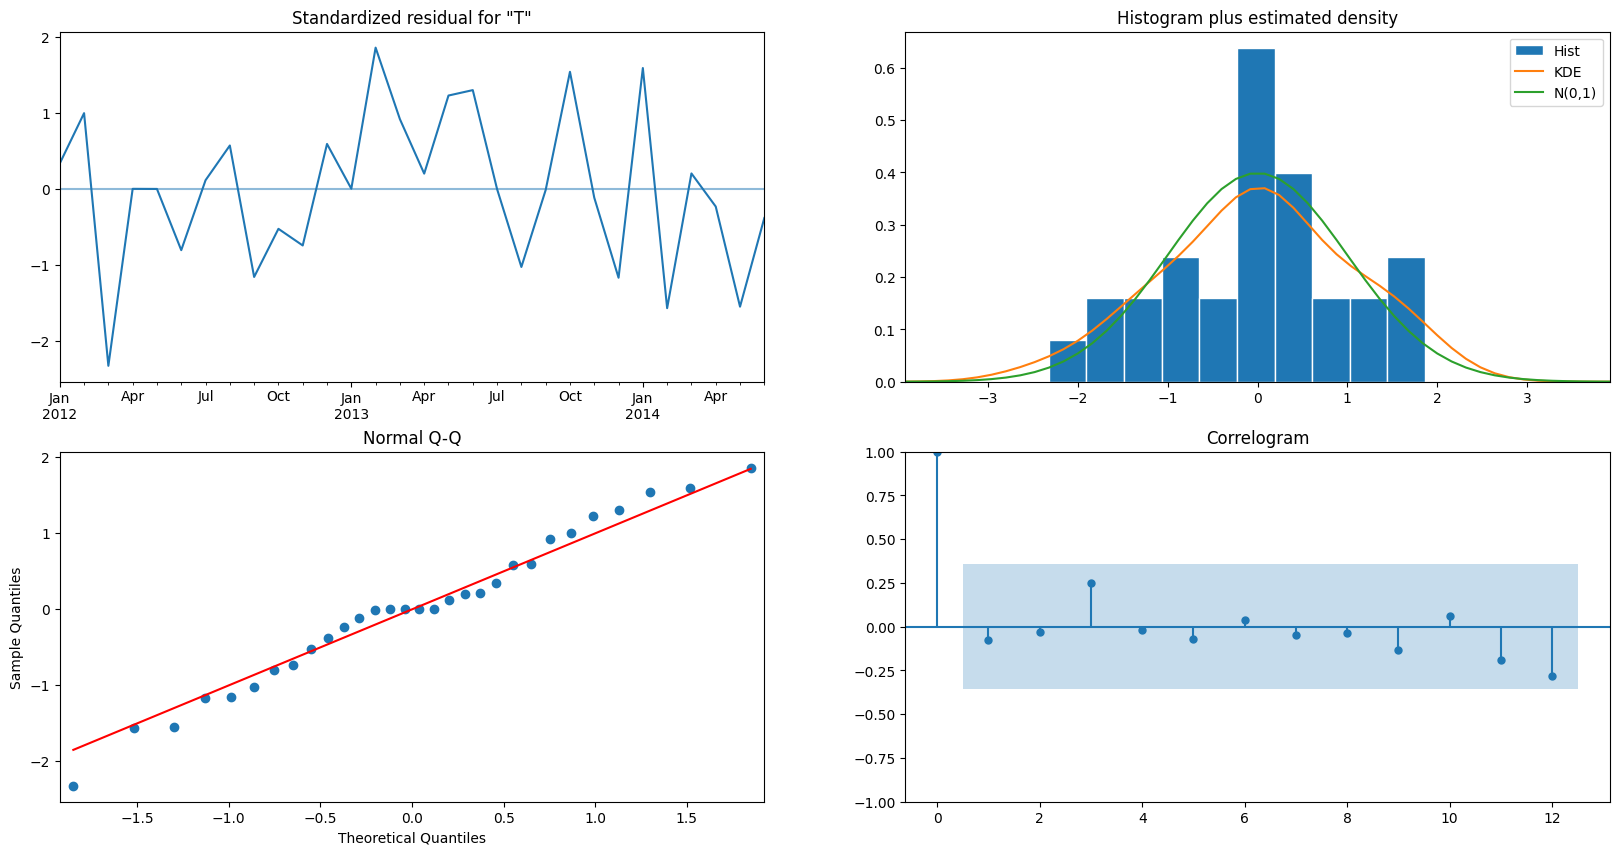

In [29]:
sar_tech.plot_diagnostics(lags=12,figsize = (20,10),);

## Forecast

In [30]:
sar_furniture.forecast(steps=6)

2014-07-31     9.605409
2014-08-31     9.636730
2014-09-30    10.311328
2014-10-31     9.340845
2014-11-30    10.541490
2014-12-31    10.637968
Freq: ME, Name: predicted_mean, dtype: float64

In [31]:
test['forecast_furniture_log']=sar_furniture.forecast(steps=6)
test['forecast_office_supplies_log']=sar_ofsupplies.forecast(steps=6)
test['forecast_technology_log']=sar_tech.forecast(steps=6)

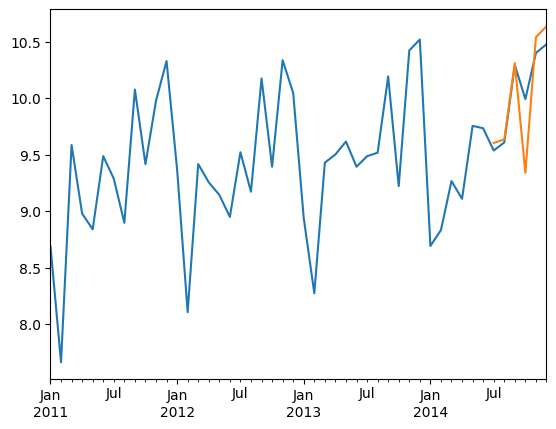

In [32]:
df['Furniture_log'].plot();
test['forecast_furniture_log'].plot();

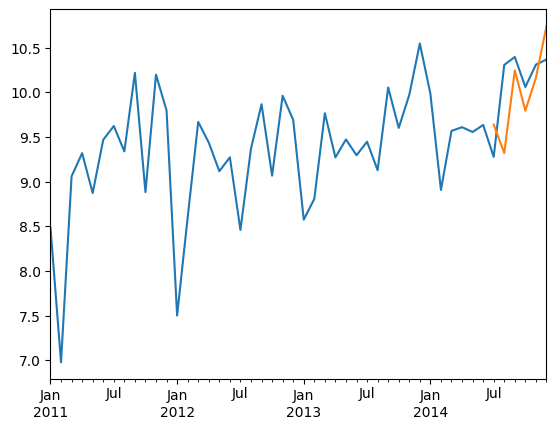

In [33]:
df['Office Supplies_log'].plot();
test['forecast_office_supplies_log'].plot();

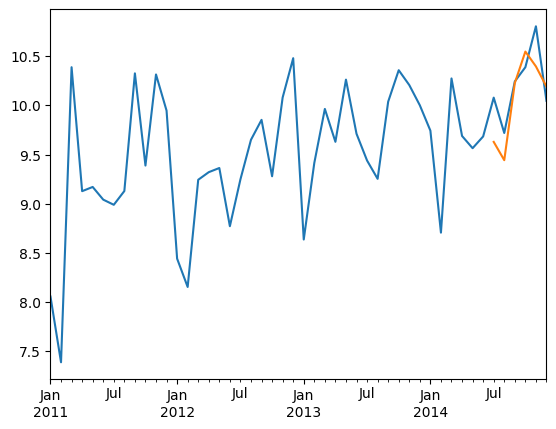

In [34]:
df['Technology_log'].plot();
test['forecast_technology_log'].plot();

## Grid Search + Cross validation 

In [35]:
import numpy as np

def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()

def grid_search_ARIMA(series,horizon,start,step_size,orders = [(1,0,0)],seasonal_orders = [(0,0,0,0)],trends=[None]):
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None
    best_trend = None
    for order_ in orders:
        for seasonal_order_ in seasonal_orders:
            for trend_ in trends:
                
                cv = functions.cross_validate(series,
                                    horizon,
                                    start,
                                    step_size,
                                    order = order_,
                                    seasonal_order = seasonal_order_,
                                    trend=trend_)
                if mape(cv)<best_mape:
                    best_mape = mape(cv)
                    best_order = order_
                    best_seasonal_order = seasonal_order_
                    best_trend = trend_
    return (best_order,best_seasonal_order, best_trend, best_mape)

In [36]:
import warnings
warnings.filterwarnings("ignore")
series = df['Furniture_log']
horizon = 6          # Predecir 1 mes hacia adelante
start = int(len(df['Furniture_log'])*.75)          
step_size = 1       # Avanzar de a 3 meses (era 1)

orders = [(0,0,0), (0,1,1), (1,1,0), (1,1,1)]  
seasonal_orders = [(0,0,0,0), (1,0,1,12), (1,0,0,12), (1,1,1,12)]  
trends = [None,'c']

grid_search_ARIMA(series = series,
                  horizon = horizon,
                  start = start,
                  step_size = step_size,
                  orders = orders,
                  seasonal_orders = seasonal_orders,
                  trends=trends)

((0, 1, 1), (1, 0, 1, 12), 'c', 0.011470693483473928)

In [37]:
import warnings
warnings.filterwarnings("ignore")
series = df['Office Supplies_log']
horizon = 6          # Predecir 1 mes hacia adelante
start = int(len(df['Office Supplies_log'])*.75)          
step_size = 1       # Avanzar de a 3 meses (era 1)

orders = [(0,0,0), (0,1,1), (1,1,0), (1,1,1)]  
seasonal_orders = [(0,0,0,0), (1,0,1,12), (1,0,0,12), (1,1,1,12)]  
trends = [None,'c']

grid_search_ARIMA(series = series,
                  horizon = horizon,
                  start = start,
                  step_size = step_size,
                  orders = orders,
                  seasonal_orders = seasonal_orders,
                  trends=trends)

((1, 1, 1), (1, 0, 1, 12), 'c', 0.028703128091322673)

In [38]:
import warnings
warnings.filterwarnings("ignore")
series = df['Technology_log']
horizon = 6          # Predecir 1 mes hacia adelante
start = int(len(df['Office Supplies_log'])*.75)          
step_size = 1       # Avanzar de a 3 meses (era 1)

orders = [(0,0,0), (0,1,1), (1,1,0), (1,1,1)]  
seasonal_orders = [(0,0,1,12), (1,0,1,12), (1,0,0,12), (1,1,1,12)]  
trends = [None,'c']

grid_search_ARIMA(series = series,
                  horizon = horizon,
                  start = start,
                  step_size = step_size,
                  orders = orders,
                  seasonal_orders = seasonal_orders,
                  trends=trends)

((1, 1, 1), (1, 0, 0, 12), 'c', 0.014603477232297794)

In [39]:
new_sar_furniture = sm.tsa.statespace.SARIMAX(train['Furniture_log'], 
                                order=(0,1,1), 
                                seasonal_order=(1,0,1,12), 
                                trend='c').fit()
new_sar_furniture.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Furniture_log   No. Observations:                   42
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 -18.910
Date:                            Fri, 04 Jul 2025   AIC                             47.820
Time:                                    20:50:34   BIC                             56.388
Sample:                                01-31-2011   HQIC                            50.940
                                     - 06-30-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.001      0.737      0.461      -0.001       0.002
ma.L1         -0.9725      0.096    -10.180      0.000      -1.160      -0.785
ar.S.L12       0.9549      0.052     18.417      0.000       0.853       1.057
ma.S.L12      -0.3758      0.314     -1.198      0.231      -0.990       0.239
sigma2         0.0873      0.032      2.749      0.006       0.025       0.150
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.77   Prob(JB):                         0.38
Heteroskedasticity (H):               0.94   Skew:                            -0.45
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

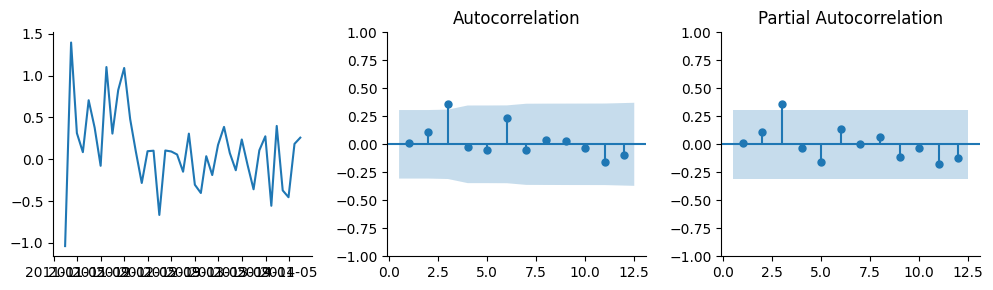

In [40]:
functions.plots(new_sar_furniture.resid[new_sar_furniture.loglikelihood_burn:], lags=12);

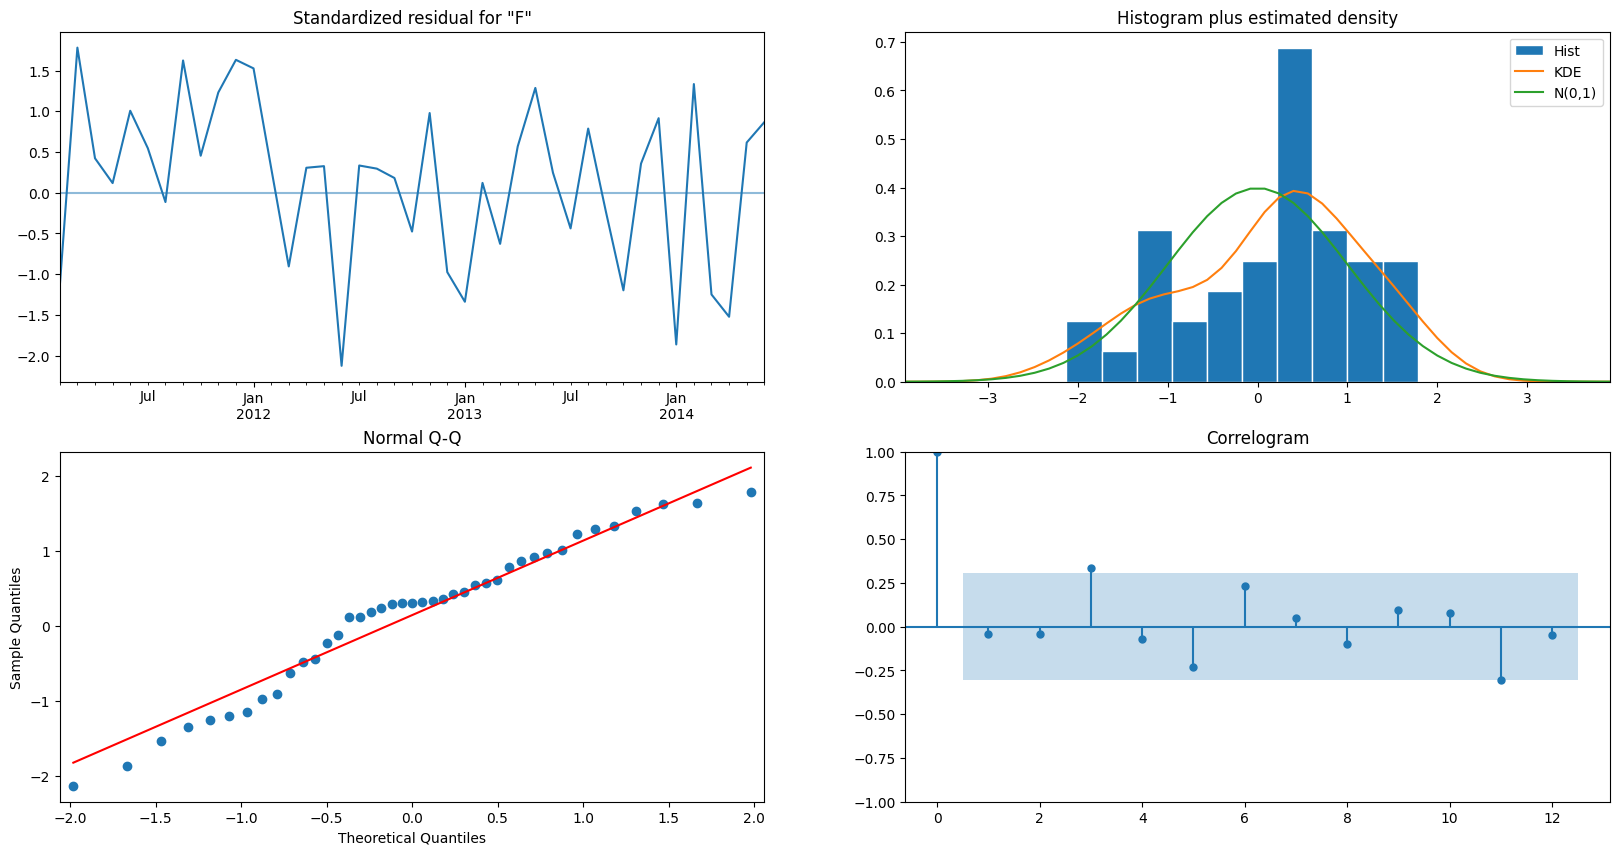

In [41]:
new_sar_furniture.plot_diagnostics(lags=12,figsize = (20,10),);

In [42]:
test['new_forecast_furniture_log']=new_sar_furniture.forecast(steps=6)

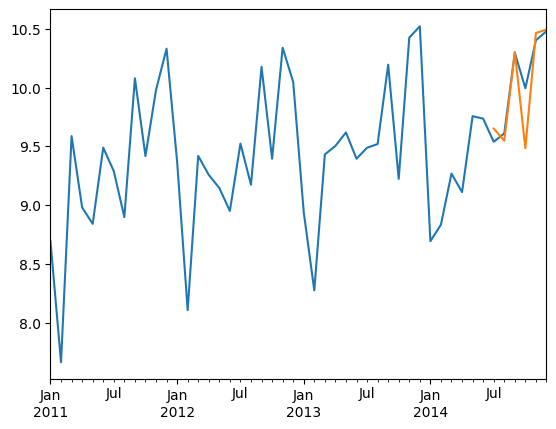

In [43]:
df['Furniture_log'].plot();
test['new_forecast_furniture_log'].plot();

In [44]:
new_sar_ofsupplies= sm.tsa.statespace.SARIMAX(train['Office Supplies_log'], 
                                order=(1,1,1), 
                                seasonal_order=(1,0,1,12), 
                                trend='c').fit()
new_sar_ofsupplies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                Office Supplies_log   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 -35.078
Date:                            Fri, 04 Jul 2025   AIC                             82.157
Time:                                    20:50:38   BIC                             92.438
Sample:                                01-31-2011   HQIC                            85.901
                                     - 06-30-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.006      0.297      0.766      -0.010       0.014
ar.L1          0.0883      0.189      0.468      0.639      -0.281       0.458
ma.L1         -1.0000    144.799     -0.007      0.994    -284.801     282.801
ar.S.L12       0.8879      0.394      2.252      0.024       0.115       1.661
ma.S.L12      -0.5458      0.856     -0.638      0.524      -2.224       1.132
sigma2         0.2587     37.427      0.007      0.994     -73.098      73.615
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.88   Prob(JB):                         0.23
Heteroskedasticity (H):               0.28   Skew:                            -0.48
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

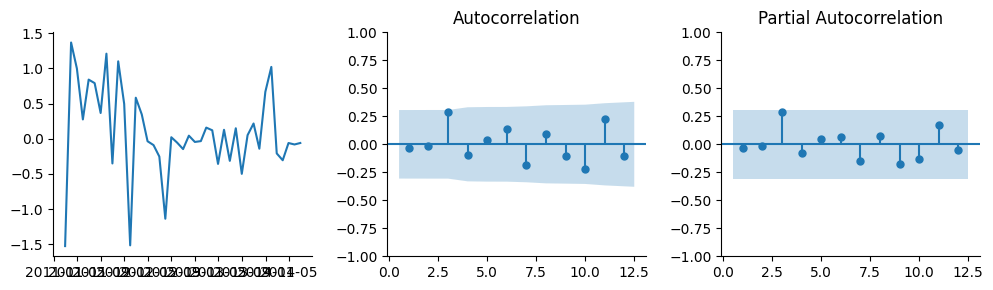

In [45]:
functions.plots(new_sar_ofsupplies.resid[new_sar_ofsupplies.loglikelihood_burn:], lags=12);

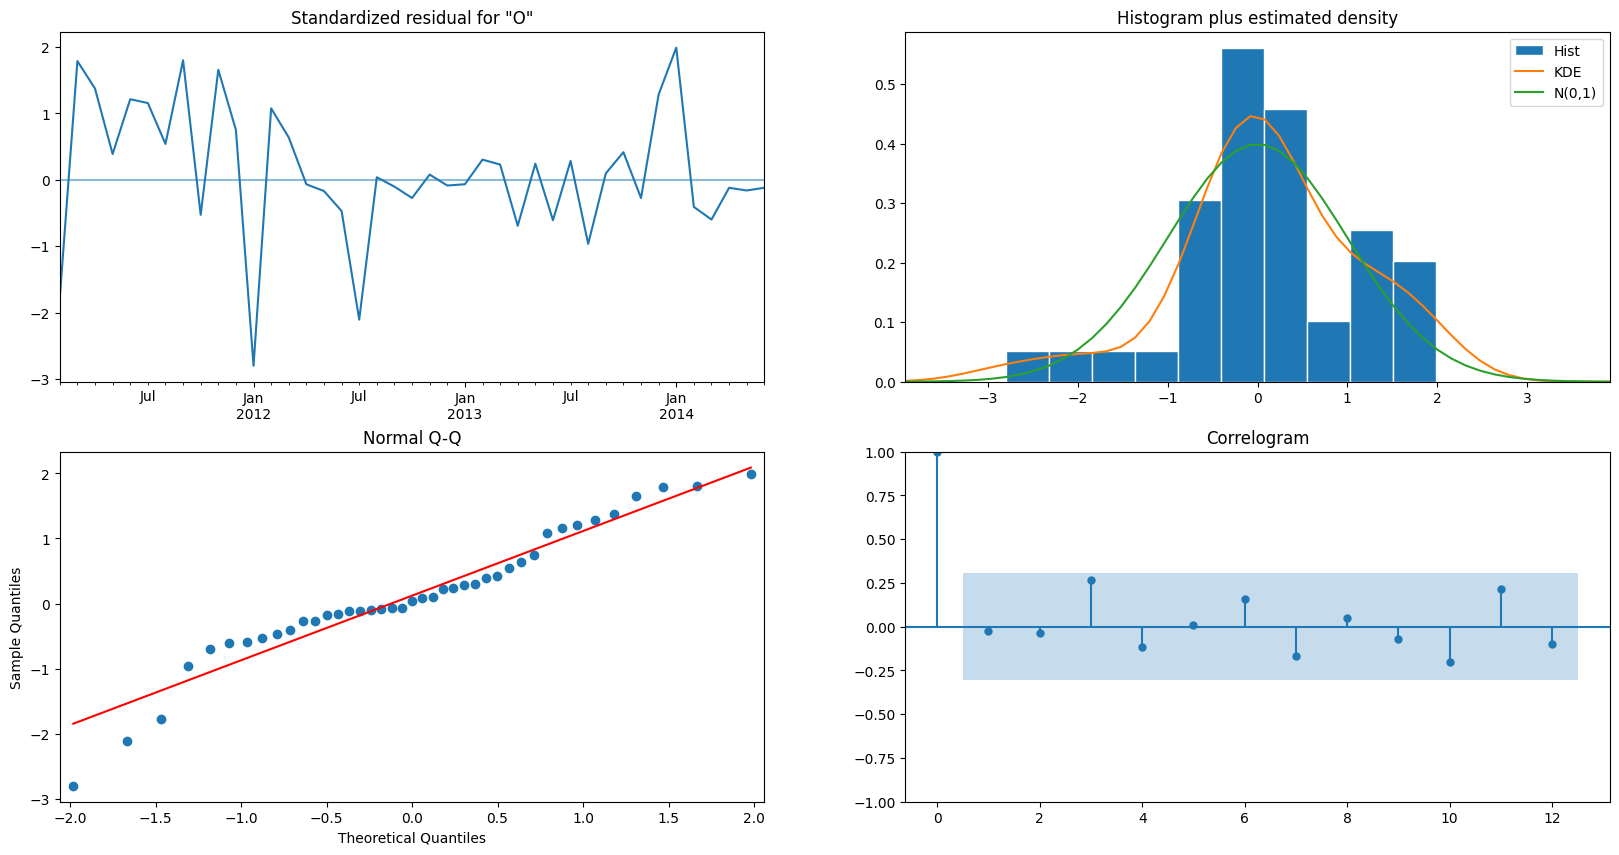

In [46]:
new_sar_ofsupplies.plot_diagnostics(lags=12,figsize = (20,10),);

In [47]:
test['new_forecast_office_supplies_log']=new_sar_ofsupplies.forecast(steps=6)

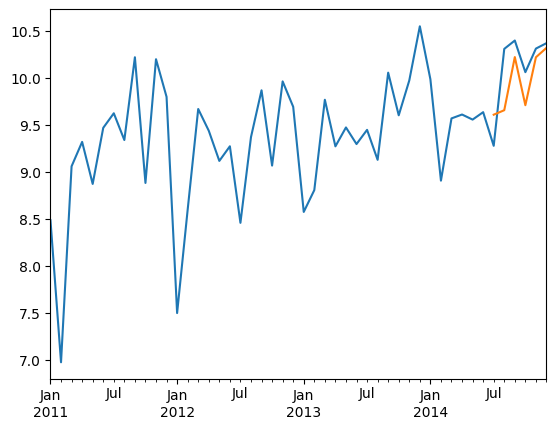

In [48]:
df['Office Supplies_log'].plot();
test['new_forecast_office_supplies_log'].plot();

In [49]:
new_sar_technology = sm.tsa.statespace.SARIMAX(train['Technology_log'], 
                                order=(1,1,1), 
                                seasonal_order=(1,0,0,12), 
                                trend='c').fit()
new_sar_technology.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Technology_log   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                 -35.636
Date:                             Fri, 04 Jul 2025   AIC                             81.272
Time:                                     20:50:41   BIC                             89.840
Sample:                                 01-31-2011   HQIC                            84.392
                                      - 06-30-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0071      0.006      1.145      0.252      -0.005       0.019
ar.L1          0.0009      0.294      0.003      0.998      -0.575       0.577
ma.L1         -0.9999     27.795     -0.036      0.971     -55.478      53.478
ar.S.L12       0.6052      0.127      4.767      0.000       0.356       0.854
sigma2         0.2742      7.614      0.036      0.971     -14.648      15.197
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.90   Prob(JB):                         0.16
Heteroskedasticity (H):               0.57   Skew:                             0.51
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

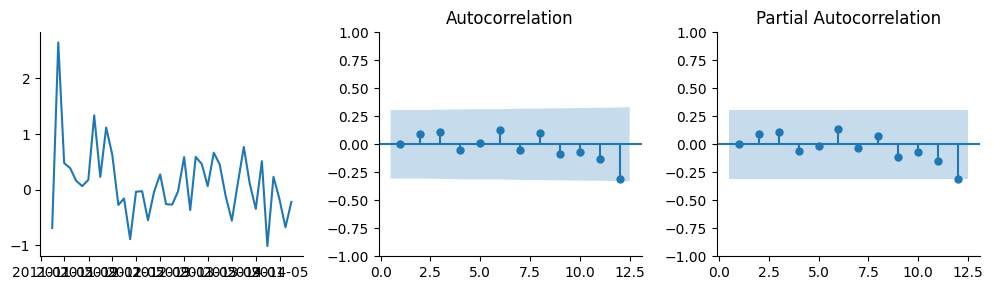

In [50]:
functions.plots(new_sar_technology.resid[new_sar_technology.loglikelihood_burn:], lags=12);

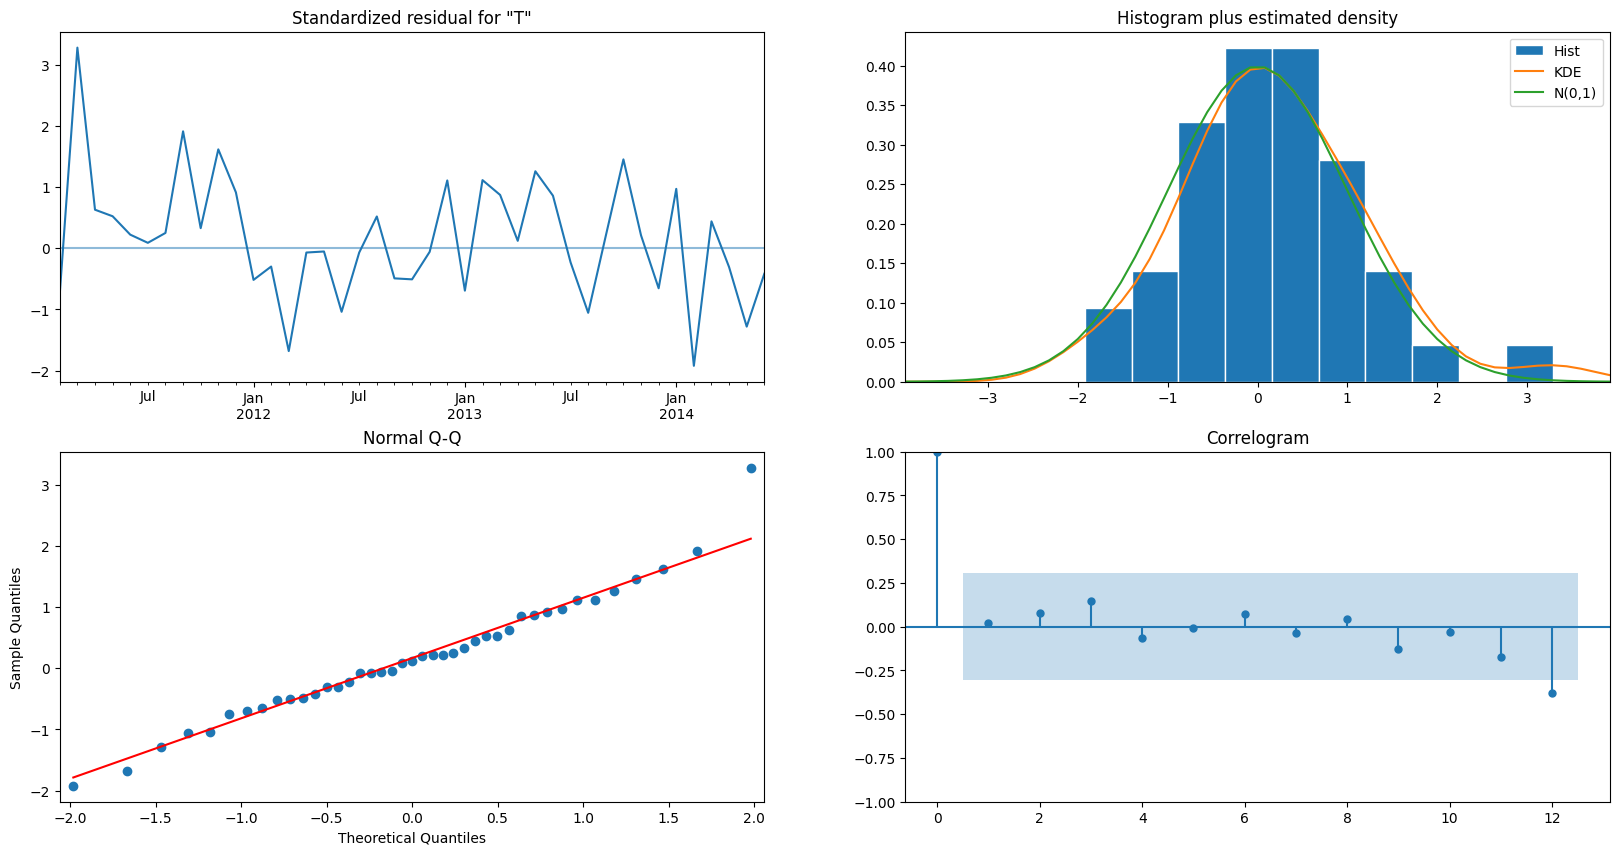

In [51]:
new_sar_technology.plot_diagnostics(lags=12,figsize = (20,10),);

In [52]:
test['new_forecast_technology_log']=new_sar_technology.forecast(steps=6)

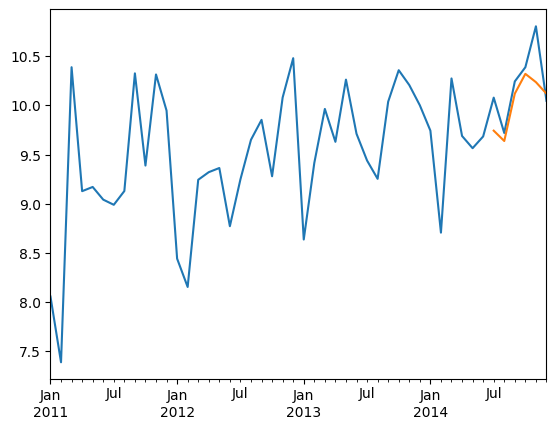

In [53]:
df['Technology_log'].plot();
test['new_forecast_technology_log'].plot();